TP  2 : Introduction à la bibliothèque spaCy et à l'analyse linguistique de texte
====

1 - Introduction 
------

L'objectif de ce TP est de se familiariser avec la bilbiothèque spaCy et de comprendre les différentes analyses linguistiques possibles au niveau du mot et notamment le couplage texte - ontologie. 

N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d\'utilisation accompagnent généralement l\'explication de chaque fonction.

- spaCy: https://spacy.io/api
- NLTK: https://www.nltk.org/
- WordCloud : https://amueller.github.io/word_cloud/
- Counter : https://docs.python.org/3/library/collections.html
- Python 3: https://docs.python.org/3/
- Matplotilb: https://matplotlib.org/contents.html

In [ ]:
## Realiser par : MESSILI Islem
## Numuro Etudiant = 22303045
## Email: messiliislem@gmail.com

In [1]:
# A exécuter si ces librairies ne sont pas sur vos machines
!pip install --user spacy
!pip install --user nltk
!pip install --user wordcloud
!python3 -m spacy download en_core_web_lg
!python3 -m spacy download fr_core_news_sm
!pip install --upgrade pip 
!pip install --upgrade Pillow

DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest th

DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
/home/messili231/.local/lib/python3.10/site-packages/numpy/lib/scimath.py:46: RuntimeWarning: divide by zero encountered in log
  _ln2 = nx.log(2.0)
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 94.2 MB/s eta 0:00:00m eta 0:00:010:00:01
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer versi

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
import spacy
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from wordcloud import WordCloud
from collections import Counter

2 - Génération de nuages de mots avec une motivation linguistique
-----

Importer le modèle de langue français.

In [2]:
# Pour impoter le moduèle : !python -m spacy download fr_core_news_sm
nlp = spacy.load("fr_core_news_sm")
# si vous voulez utiliser un autre modèle voici quelques liens intéressants
# Tous les modèles : https://spacy.io/models
# Anglais : https://spacy.io/models/en
# Italien : https://spacy.io/models/it

Lire l'un des deux textes proposés dans ce TP: sport.text ou sante.text.

In [3]:
text_path1 = "sport.txt"
##text_path2 = "sante.txt"

text1 = ""
with open(text_path1, encoding='utf-8') as f:
    text1 = f.read()
    
##text2 = ""
##with open(text_path2, encoding='utf-8') as f:
    ##text2 = f.read()

In [4]:
text1

'France-Australie : une première demi-heure fondatrice pour les Bleus dans cette Coupe du monde 2022 ?\n\nL\'entame de match des Bleus, ratée mardi contre l\'Australie malgré la victoire finale (4-1), pourrait servir de déclic pour le reste du Mondial.\n\nL\'incompréhension d\'Hugo Lloris. Le regard noir de Benjamin Pavard. L\'inquiétude autour de Lucas Hernandez. L\'équipe de France n\'est entrée que depuis neuf minutes dans sa Coupe du monde 2022, mardi 22 novembre, qu\'elle se trouve déjà en pleine tourmente. Menés par l\'Australie, les Bleus voient les spectres des derniers mois resurgir soudainement : les blessures, les mauvais résultats, les doutes. La France se prend de plein fouet le mur sur lequel se brisent les ambitions des champions du monde en titre lors des dernières éditions.\n\nDevancés au tableau d\'affichage après le but de Craig Goodwin, les Bleus doivent en plus digérer la blessure de Lucas Hernandez. "Je pense que ça va être malheureusement assez grave", a confirmé

Transformer le texte en un objet "nlp" de la bibliothèque spaCy qui vous permet d'accéder facilement aux objets textuels.

In [5]:
doc = nlp(text1)

In [6]:
doc

France-Australie : une première demi-heure fondatrice pour les Bleus dans cette Coupe du monde 2022 ?

L'entame de match des Bleus, ratée mardi contre l'Australie malgré la victoire finale (4-1), pourrait servir de déclic pour le reste du Mondial.

L'incompréhension d'Hugo Lloris. Le regard noir de Benjamin Pavard. L'inquiétude autour de Lucas Hernandez. L'équipe de France n'est entrée que depuis neuf minutes dans sa Coupe du monde 2022, mardi 22 novembre, qu'elle se trouve déjà en pleine tourmente. Menés par l'Australie, les Bleus voient les spectres des derniers mois resurgir soudainement : les blessures, les mauvais résultats, les doutes. La France se prend de plein fouet le mur sur lequel se brisent les ambitions des champions du monde en titre lors des dernières éditions.

Devancés au tableau d'affichage après le but de Craig Goodwin, les Bleus doivent en plus digérer la blessure de Lucas Hernandez. "Je pense que ça va être malheureusement assez grave", a confirmé Didier Deschamps

Fonction qui retourne la fréquence des 50 mots les plus fréquents dans un document.

In [7]:
freq_list = Counter(token.text for token in doc if "\n" not in token.text)
freq_list.most_common(50)

[(',', 51),
 ('.', 40),
 ('de', 35),
 ('les', 19),
 ('le', 19),
 ('en', 14),
 ('a', 13),
 ('du', 12),
 ('la', 12),
 ('"', 12),
 ('des', 11),
 ('Bleus', 9),
 ('dans', 9),
 ("l'", 9),
 ('se', 9),
 ('et', 9),
 ('pour', 8),
 ('sur', 8),
 ("d'", 7),
 (':', 6),
 ('une', 6),
 ('monde', 6),
 ('Lucas', 6),
 ('France', 5),
 ("L'", 5),
 ('Hernandez', 5),
 ('équipe', 5),
 ('est', 5),
 ('que', 5),
 ('par', 5),
 ('plus', 5),
 ('un', 5),
 ('qui', 5),
 ('-', 4),
 ('Australie', 4),
 ('cette', 4),
 ('Coupe', 4),
 ('mois', 4),
 ('La', 4),
 ('après', 4),
 ('but', 4),
 ('blessure', 4),
 ('Didier', 4),
 ('Deschamps', 4),
 ('pas', 4),
 ('match', 3),
 ('contre', 3),
 ('victoire', 3),
 ('(', 3),
 (')', 3)]

[Q1] Programmer la suite d'instructions pour calculer les 40 mots les plus fréquents du fichier sante.txt.

In [8]:
text_path2 = "sante.txt"

text2 = ""
with open(text_path2, encoding='utf-8') as f:
    text2 = f.read()

docc = nlp(text2)

freq_listt = Counter(token.text for token in docc if "\n" not in token.text)
freq_listt.most_common(40)

[('de', 52),
 (',', 50),
 ('les', 39),
 ('la', 35),
 ('.', 35),
 ('"', 22),
 ('et', 21),
 ('en', 20),
 ('le', 20),
 ('à', 19),
 ('grippe', 17),
 ('vaccination', 16),
 ("l'", 16),
 ('est', 16),
 ('personnes', 12),
 ('contre', 10),
 ('une', 10),
 ('a', 10),
 ('des', 9),
 ('?', 8),
 ('(', 8),
 (')', 8),
 ("d'", 7),
 ('faire', 7),
 ('moins', 7),
 ('Covid-19', 7),
 ('sur', 6),
 ('campagne', 6),
 ('que', 6),
 ('vacciner', 6),
 ('octobre', 6),
 ('par', 6),
 ('du', 6),
 ('vous', 6),
 ('-', 6),
 ('un', 6),
 ('pas', 6),
 ('plus', 5),
 ('fragiles', 5),
 ('deux', 5)]

Fonction qui génère un nuage de mots à partir d'une liste de mots ordonnés par leur fréquence.

In [9]:
def generate_wordcloud(freq_list):
    wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(freq_list)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

Génerer le nuage de mots

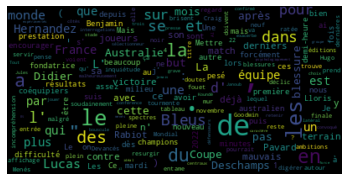

In [10]:
generate_wordcloud(freq_list)

[Q2] Générer le nuage de mots du fichier sante.txt.

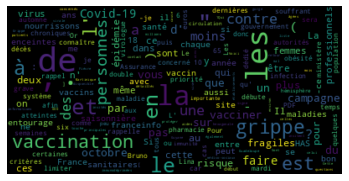

In [41]:
generate_wordcloud(freq_listt)

Fonction qui ne compte que les fréquences des mots qui ne sont pas de mots vides. Rappel, un mot vide est un mot qui n'a pas de sens dénotatif particulier. Ce sont les déterminants, les prépositions etc.

In [57]:
freq_list_non_vide = Counter(token.text for token in doc if "\n" not in token.text if not token.is_stop)

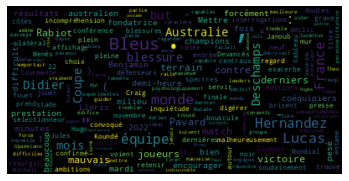

In [58]:
generate_wordcloud(freq_list_non_vide)

[Q3] Générer le nuage de mots pour tous les mots sauf ceux qui sont un mot vide ou une ponctuation.

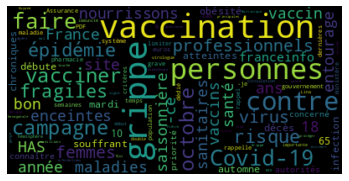

In [59]:
freq_list_non_vide = Counter(token.text for token in docc if "\n" not in token.text if not token.is_stop and not token.is_punct)
generate_wordcloud(freq_list_non_vide)

Fonction qui génère un nuage de lemmes, i.e. du radical d'un mot.

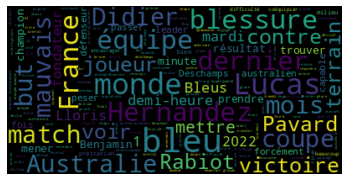

In [60]:
freq_list_lemmes = Counter(token.lemma_ for token in doc if "\n" not in token.text if not token.is_stop and not token.is_punct)
generate_wordcloud(freq_list_lemmes)

Fonction qui génère un nuage de lemmes nominaux, i.e. seulement les noms.

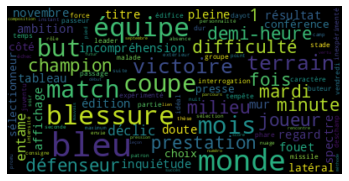

In [61]:
freq_list_lemmes_nom = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN")
generate_wordcloud(freq_list_lemmes_nom)

[Q4] Générer le nuage de lemmes adjectivaux pour le texte sante.txt.

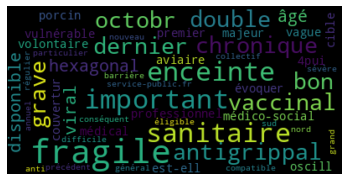

In [66]:
freq_list_lemmes_adj = Counter(token.lemma_ for token in docc if not token.is_stop and not token.is_punct and token.pos_ == "ADJ")
generate_wordcloud(freq_list_lemmes_adj)

Fonction qui génère un nuage d'entités nommées de type personne.

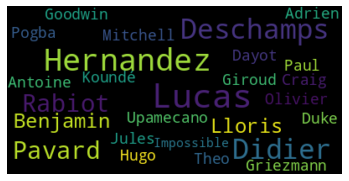

In [64]:
freq_list_personne = Counter(token.text for token in doc if not token.is_stop and not token.is_punct and token.ent_type_ == "PER")
generate_wordcloud(freq_list_personne)

[Q5] Générer le nuage d'entités nommées de type Localisation pour le texte sante.txt.

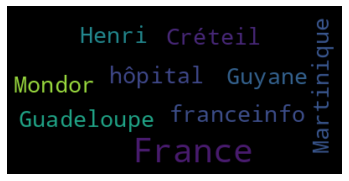

In [69]:
freq_list_loc = Counter(token.text for token in docc if not token.is_stop and not token.is_punct and token.ent_type_ == "LOC")
generate_wordcloud(freq_list_loc)

Fonction qui génère un nuage de mots qui sont compléments d'objet.

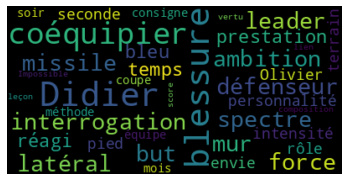

In [87]:
freq_list_obj = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.dep_ == "obj")
generate_wordcloud(freq_list_obj)

[Q6] Générer le nuage des noms qui sont un sujet pour le texte sport.txt.

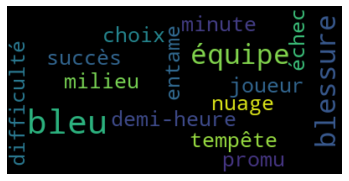

In [42]:
freq_list_sujet = Counter(token.lemma_ for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN" and token.dep_ == "nsubj")
generate_wordcloud(freq_list_sujet)

3 - Liste des informations linguistiques et leur visualisation
-----

Fonction qui montre toutes les informations linguistiques disponibles pour chacune des phrases d'un texte.

In [12]:
print('\n'.join(['\t'.join([str(token.i), token.text, token.lemma_, token.pos_, str(token.morph), str(token.head.i), token.dep_, token.ent_type_, token.ent_iob_]) for sent in doc.sents
                 for token in sent]))

0	France	France	PROPN	Gender=Fem|Number=Sing	0	ROOT		O
1	-	-	PROPN		1	ROOT		O
2	Australie	Australie	PROPN		2	ROOT		O
3	:	:	PUNCT		2	punct		O
4	une	un	DET	Definite=Ind|Gender=Fem|Number=Sing|PronType=Art	6	det		O
5	première	premier	ADJ	Gender=Fem|NumType=Ord|Number=Sing	6	amod		O
6	demi-heure	demi-heure	NOUN	Gender=Fem|Number=Sing	2	nmod		O
7	fondatrice	fondateur	ADJ	Number=Sing	6	amod		O
8	pour	pour	ADP		10	case		O
9	les	le	DET	Definite=Def|Number=Plur|PronType=Art	10	det		O
10	Bleus	bleu	NOUN	Gender=Masc|Number=Sing	6	nmod	ORG	B
11	dans	dans	ADP		13	case		O
12	cette	ce	DET	Gender=Fem|Number=Sing|PronType=Dem	13	det		O
13	Coupe	coupe	NOUN	Gender=Fem|Number=Sing	6	nmod	MISC	B
14	du	de	ADP	Definite=Def|Gender=Masc|Number=Sing|PronType=Art	15	case	MISC	I
15	monde	monde	NOUN	Gender=Masc|Number=Sing	13	nmod	MISC	I
16	2022	2022	NUM	NumType=Card	6	nmod	MISC	I
17	?	?	PUNCT		2	punct		O
18	

	

	SPACE		17	dep		O
19	L'	le	DET	Definite=Def|Number=Sing|PronType=Art	20	det		O
20	entame	entame	NOUN	G

Visualisation des entités nommées dans un texte.

In [13]:
from spacy import displacy
displacy.render(doc, style="ent")

Visualisation de l'abre de dépendance d'une phrase donnée.

In [14]:
displacy.render(list(doc.sents)[4], style="dep")

[Q7] Visualiser l'abre de dépendance de la dixième phrase dans un format compact.

In [15]:
displacy.render(list(doc.sents)[9], style="ent")

4 - Utilisation d'une image pour la réalisation d'un nuage de mots
-----

In [16]:
from PIL import Image
import numpy as np

Convertir l'image en une matrice de valeurs 0 ou 255, i.e. un masque.

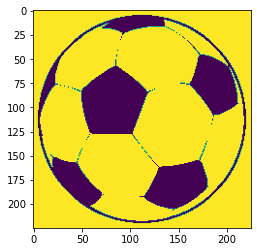

In [17]:
#mask = (np.array(Image.open("heart.png").convert('L')) > 0) * 255
mask = (np.array(Image.open("football.png").convert('L')) > 0) * 255
plt.imshow(mask)

Génerer le nuage de mots avec des masques. 

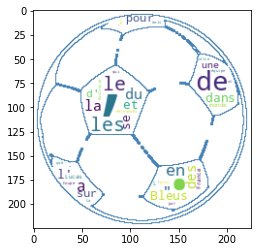

In [18]:
wc = WordCloud(background_color="white", max_words=100, mask=mask, contour_width=1, contour_color='steelblue')
wc.generate_from_frequencies(freq_list)
plt.imshow(wc, interpolation='bilinear')

5 - Extraire des unités polylexicales
-----

In [19]:
import nltk
from nltk.collocations import *

Trouver les bigrams avec l'information mutuelle la plus forte.

In [20]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(bigram_measures.pmi, 10)

[('22', 'novembre'),
 ('Antoine', 'Griezmann'),
 ('Au', 'point'),
 ('Craig', 'Goodwin'),
 ('Dayot', 'Upamecano'),
 ('Golo', 'Kanté'),
 ('Jules', 'Koundé'),
 ('Mitchell', 'Duke'),
 ("N'", 'Golo'),
 ('Olivier', 'Giroud')]

[Q8] Trouver les 10 bigrams avec le coefficient de DICE le plus élevé.

In [23]:
finder.nbest(bigram_measures.dice, 10)

[('22', 'novembre'),
 ('Antoine', 'Griezmann'),
 ('Au', 'point'),
 ('Craig', 'Goodwin'),
 ('Dayot', 'Upamecano'),
 ('Didier', 'Deschamps'),
 ('Golo', 'Kanté'),
 ('Jules', 'Koundé'),
 ('Mitchell', 'Duke'),
 ("N'", 'Golo')]

Trouver les 10 trigrams avec l'information mutuelle la plus élevée.

In [58]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words([token.text for token in doc])
finder.nbest(trigram_measures.pmi, 10)

[("N'", 'Golo', 'Kanté'),
 ('Promu', 'titulaire', 'indiscutable'),
 ('convoqué', 'trois', 'défenseurs'),
 ('déroulé', 'comme', 'rarement'),
 ('naturel', 'chez', 'moi'),
 ('ont', 'déroulé', 'comme'),
 ('paradoxalement', 'semblé', 'débloquer'),
 ('prendre', 'quelques', 'secondes'),
 ('sans', 'même', 'regarder'),
 ('tempête', 'emportait', 'tout')]

[Q9] Trouver les 10 trigrams avec le coefficient de DICE le plus élevé. Que se passe-t-il? Quelles sont les alternatives?

In [82]:
finder.nbest(trigram_measures.raw_freq, 10)
##finder.nbest(trigram_measures.chi_sq, 10)

[('Coupe', 'du', 'monde'),
 ('blessure', 'de', 'Lucas'),
 (',', 'les', 'Bleus'),
 ('de', 'Lucas', 'Hernandez'),
 ('sur', 'le', 'terrain'),
 ('équipe', 'de', 'France'),
 ('"', ',', 'a'),
 ('"', 'La', 'blessure'),
 ('-', '1', ')'),
 ('Didier', 'Deschamps', 'en')]

Intégrer les 30 meilleurs bigrams suivant le coefficient de DICE dans un texte en les connectant par un underscore. Et générer le nuage de mot correspondant. 

In [37]:
from nltk.tokenize import MWETokenizer

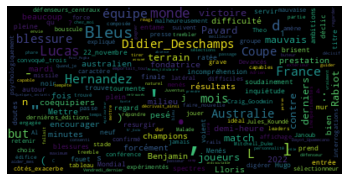

In [71]:
finder = BigramCollocationFinder.from_words([token.text for token in doc])
tokenizer = MWETokenizer(finder.nbest(bigram_measures.dice, 30))
new_doc = nlp(' '.join(tokenizer.tokenize([token.text for token in doc if "\n" not in token.text])))
generate_wordcloud(Counter([token.text for token in new_doc if not token.is_stop]))

[Q10] Intégrer les 30 meilleurs trigrams suivant l'information mutuelle dans un texte en les connectant par un underscore. Et générer un nuage de mot qui ne contient que des trigrams.

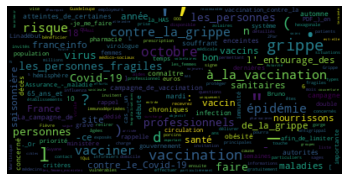

In [86]:
finder_tri = TrigramCollocationFinder.from_words([token.text for token in docc])
tokenizer = MWETokenizer(finder_tri.nbest(trigram_measures.raw_freq, 30))
new_doc_tri = nlp(' '.join(tokenizer.tokenize([token.text for token in docc if "\n" not in token.text])))
generate_wordcloud(Counter([token.text for token in new_doc_tri if not token.is_stop]))

6 - Enrichissement des textes par liaison ontologique
-----

In [15]:
from nltk.corpus import wordnet as wn
#import nltk
#nltk.download('omw-1.4')

L'algorithme de Lesk (https://en.wikipedia.org/wiki/Lesk_algorithm) permet de désambiguiser le sens d'un mot dans un contexte défini. Par exemple, dans la phrase, "le chanteur danse la java avec des choristes", l'algorithme de Lesk permet de désambiguiser le sens de java, i.e. java dans les sens de danse et non java dans le sens de café ou de langage de programmation. L'algorithme de Lesk retourne le sens correspondant à un mot dans un contexte donné.

In [16]:
def lesk(context_sentence, ambiguous_word, pos=None, synsets=None):
    
    """Return a synset for an ambiguous word in a context.
    :param iter context_sentence: The context sentence where the ambiguous word
         occurs, passed as an iterable of words.
    :param str ambiguous_word: The ambiguous word that requires WSD.
    :param str pos: A specified Part-of-Speech (POS).
    :param iter synsets: Possible synsets of the ambiguous word.
    :return: ``lesk_sense`` The Synset() object with the highest signature overlaps.
    This function is an implementation of the original Lesk algorithm (1986) [1].
    Usage example::
        >>> lesk(['I', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'money', '.'], 'bank', 'n')
        Synset('savings_bank.n.02')
    [1] Lesk, Michael. "Automatic sense disambiguation using machine
    readable dictionaries: how to tell a pine cone from an ice cream
    cone." Proceedings of the 5th Annual International Conference on
    Systems Documentation. ACM, 1986.
    https://dl.acm.org/citation.cfm?id=318728
    """

    context = set(context_sentence)
    
    if synsets is None:
        # synsets = wn.synsets(ambiguous_word, lang='fra')
        synsets = wn.synsets(ambiguous_word)
    
    if pos:
        synsets = [ss for ss in synsets if str(ss.pos()) == pos]

    if not synsets:
        return None
    
    _, sense = max(
        (len(context.intersection(ss.definition().split())), ss) for ss in synsets
    )

    return sense

Nous travaillerons avec un texte en anglais pour avoir toutes les fonctions nécessaires d'accès à wordnet. Si vous voulez tester d'autres langues, l'italien et l'espagnol fonctionnent.

In [17]:
nlp = spacy.load("en_core_web_lg")

text_path3 = "sport-en.txt"

text3 = ""
with open(text_path3, encoding='utf-8') as f:
    text3 = f.read()
    
doc = nlp(text3)

Pour tous les mots d'un texte, trouver le sens de chacun d'eux dans wordnet. Attention, seuls les noms, les verbes, les adjectifs et les adverbes se trouvent dans wordnet. Dans cet exemple, le contexte donné est celui de la phrase dans lequel se trouve le mot.

In [18]:
pos_to_wn = {'NOUN': wn.NOUN, 'VERB': wn.VERB, 'ADJ': wn.ADJ, 'ADV': wn.ADV, 'PROPN': wn.NOUN}

sent_level = []

for sent in doc.sents:
    context = [token.text for token in sent]
    for token in sent:
        if token.pos_ in pos_to_wn:
            # print((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
            sent_level.append((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
        else:
            sent_level.append((token.text, None))

sent_level

[('The', None),
 ('US', Synset('uranium.n.01')),
 ('Men', Synset('serviceman.n.01')),
 ('’s', None),
 ('National', Synset('national.n.01')),
 ('Team', Synset('team.n.02')),
 ('(', None),
 ('USMNT', None),
 (')', None),
 ('was', None),
 ('made', Synset('make.v.42')),
 ('to', None),
 ('work', Synset('work.v.01')),
 ('hard', Synset('hard.r.10')),
 ('for', None),
 ('its', None),
 ('place', Synset('seat.n.01')),
 ('in', None),
 ('the', None),
 ('World', Synset('world.n.06')),
 ('Cup', Synset('cup.n.08')),
 ('knockout', Synset('knockout.n.02')),
 ('stage', Synset('stage.n.08')),
 (',', None),
 ('earning', Synset('gain.v.08')),
 ('a', None),
 ('tough', Synset('tough.a.07')),
 ('1', None),
 ('-', None),
 ('0', None),
 ('win', Synset('win.n.01')),
 ('over', None),
 ('Iran', Synset('iran.n.01')),
 ('in', None),
 ('a', None),
 ('nerve', Synset('nerve.n.01')),
 ('-', None),
 ('racking', Synset('rack.v.10')),
 ('Group', Synset('group.n.03')),
 ('B', Synset('boron.n.01')),
 ('decider', None),
 ('at'

[Q11] Pour tous les mots d'un texte, trouver le sens de chacun d'eux dans wordnet en utilisant l'ensemble du document pour désambiguiser le sens? Quels sont vos commentaires par rapport à une désambiguisation basée sur la phrase uniquement.

In [19]:
pos_to_wn = {'NOUN': wn.NOUN,
             'VERB': wn.VERB,
             'ADJ': wn.ADJ,
             'ADV': wn.ADV,
             'PROPN': wn.NOUN}

doc_level = []

context = [token.text for token in doc]

for token in doc:
    if token.pos_ in pos_to_wn:
        # print((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
        doc_level.append((token.text, lesk(context, token.lemma_, pos=pos_to_wn[token.pos_])))
    else:
        doc_level.append((token.text, None))

sent_level

[('The', None),
 ('US', Synset('uranium.n.01')),
 ('Men', Synset('serviceman.n.01')),
 ('’s', None),
 ('National', Synset('national.n.01')),
 ('Team', Synset('team.n.02')),
 ('(', None),
 ('USMNT', None),
 (')', None),
 ('was', None),
 ('made', Synset('make.v.42')),
 ('to', None),
 ('work', Synset('work.v.01')),
 ('hard', Synset('hard.r.10')),
 ('for', None),
 ('its', None),
 ('place', Synset('seat.n.01')),
 ('in', None),
 ('the', None),
 ('World', Synset('world.n.06')),
 ('Cup', Synset('cup.n.08')),
 ('knockout', Synset('knockout.n.02')),
 ('stage', Synset('stage.n.08')),
 (',', None),
 ('earning', Synset('gain.v.08')),
 ('a', None),
 ('tough', Synset('tough.a.07')),
 ('1', None),
 ('-', None),
 ('0', None),
 ('win', Synset('win.n.01')),
 ('over', None),
 ('Iran', Synset('iran.n.01')),
 ('in', None),
 ('a', None),
 ('nerve', Synset('nerve.n.01')),
 ('-', None),
 ('racking', Synset('rack.v.10')),
 ('Group', Synset('group.n.03')),
 ('B', Synset('boron.n.01')),
 ('decider', None),
 ('at'

7 - PROJET : Réécrire un texte avec des informations retirées de wordnet 
-----

[PROJET Q1] Réécrire un texte en interchangeant un mot par son antonyme. Par exemple, "petit" devient "grand" et "laideur" devient "beauté". Vous pourrez utiliser la fonction highligth_word() pour mettre en avant les mots qui ont été changés.

In [5]:
def highlight_word(word):
    return "\x1b[43m" + word + "\x1b[m"

In [6]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_lg")

original_text = ""
text_path = "sport-en.txt"

with open(text_path, encoding='utf-8') as f:
    original_text = f.read()

doc = nlp(original_text)

/home/messili231/.local/lib/python3.10/site-packages/thinc/layers/layernorm.py:25: RuntimeWarning: divide by zero encountered in power
  Xhat = (X - mu) * var ** (-1.0 / 2.0)


In [7]:
from nltk.corpus import wordnet

def get_antonyms(word):
    antonyms = set()

    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            for antonym in lemma.antonyms():
                antonyms.add(antonym.name())

    return list(antonyms)

for token in doc:
    if not token.is_stop and not token.is_punct :
        antonyms = get_antonyms(token.text)
        if antonyms:
           print(highlight_word(antonyms[0]) + " " + token.text)
        else:
           print(token.text) 

woman Men
local National
Team
USMNT
idle work
easy hard
divest place
World
Cup
knockout
stage
earning
tender tough
1
0
fall_back win
Iran
nerve
racking
Group
B
decider
Qatar
2022



unchristian Christian
Pulisic
whole half
goal
unite separated
sides
USMNT
reached
square round
16
time
2014



pressure
certainly
Gregg
Berhalter
Qatar
local national
team
achiever failure
disqualify qualify
2018
World
Cup
take_away got
job
gritty
group
performances



certainly
unreasonably pretty
times
general particular
open closing
stages
Iran
regress progressing
group
stage
maximal minimum
expectation
stifle exciting
old young
team



unconcern concerns
malfunction going
knockout
stages
Pulisic
enjoy suffered
abdominal
injury
scoring
loser winner



USMNT
despair hoping
star
woman man
dubbed
Captain
America
unfit fit
square round
16
disconnect tie
Netherlands
Saturday
leading following
news
Pulisic
unsent sent
hospital
scan



Weston
McKennie
Tyler
Adams
celebrate
fold opening
goal



loser Winner
disc

[PROJET Q2] Réécrire un texte en interchangeant tous les mots par leur hyponyme le plus profond dans wordnet pour un contexte donné. Ainsi, pour chaque mot vous devrez (1) trouver son synset, (2) descendre dans l'arbre en choisissant le prochain synset selon la relation d'hyperonimie, (3) parmi les hyponymes possibles choisir celui qui est le plus probable selon l'algorithme de Lesk. Par exemple, "groupe" devient "sous-groupe", "chat" devient "siamois".

In [8]:
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from pprint import pprint


def lesk(context_sentence, ambiguous_word, pos=None, synsets=None):

    context = set(context_sentence)
    
    if synsets is None:
        # synsets = wn.synsets(ambiguous_word, lang='fra')
        synsets = wn.synsets(ambiguous_word)
    
    if pos:
        synsets = [ss for ss in synsets if str(ss.pos()) == pos]

    if not synsets:
        return None
    
    _, sense = max(
        (len(context.intersection(ss.definition().split())), ss) for ss in synsets
    )

    return sense

context = word_tokenize(original_text)

for token in doc:
        
    ambiguous_word = token.text
    sense = lesk(context, ambiguous_word)
    
    if sense:
        if sense.hyponyms() != []:
            deepest_hyponym = max(sense.hyponyms(), key=lambda s: len(set(s.definition().split())))
            deepest_hyponym = str(deepest_hyponym.name())
            split_word = deepest_hyponym.split('.')
            result = split_word[0]
            print(highlight_word(result) + " " + token.text)
        
        else:
            deepest_hyponym = str(sense.name())
            split_word = deepest_hyponym.split('.')
            result = split_word[0]
            print(highlight_word(result) + " " + token.text)
    
    else:
        print(token.text)

The
uracil US
man Men
’s
national National
relay Team
(
USMNT
)
account was
go_through_the_motions made
to
work work
arduous hard
for
information_technology its
showplace place
in in
the
worldly_concern World
davis_cup Cup
smasher knockout
mise_en_scene stage
,
profit earning
deoxyadenosine_monophosphate a
street_fighter tough
one 1
-
zero 0
take_the_cake win
maiden_over over
iran Iran
in in
deoxyadenosine_monophosphate a
radial_nerve nerve
-
rack racking
subgroup Group
barn B
decider
astatine at
qatar Qatar
2022
.



melkite Christian
Pulisic
’s
first_base first
-
first_half half
basket goal
account was
wholly all
that
twig separated
the
craps two
english sides
deoxyadenosine_monophosphate as
the
USMNT
reach reached
the
round round
of
sixteen 16
for
the
first_base first
time time
since
2014
.



The
pressure pressure
account was
surely certainly
on on
for
Gregg
Berhalter
’s
english side
in in
qatar Qatar
subsequently after
the
national national
relay team
’s
bankrupt failure
to
provid

translate move
.



weston Weston
McKennie
’s
pinpoint pinpoint
lorraine_cross cross
magnetic_field field
ball ball
account was
headed headed
tailback back
across across
basket goal
by by
the
maraud marauding
Sergiño
five_hundred Dest
and
bundle bundled
home_plate home
bravely bravely
by by
Pulisic
,
world_health_organization who
suffer suffered
deoxyadenosine_monophosphate a
hefty hefty
collision collision
with
Beiranvand
deoxyadenosine_monophosphate as
helium he
evert turned
the
ball ball
maiden_over over
the
production_line line
.



The
USMNT
’s
joy delight
swiftly swiftly
evert turned
to
concern worry
deoxyadenosine_monophosphate as
information_technology it
account was
apparent evident
that
Pulisic
account was
in in
significant significant
unpleasantness pain
trailing following
the
clash clash
,
limp limping
heavy heavily
deoxyadenosine_monophosphate as
helium he
account was
serve helped
away off
the
pitch pitch
by by
craps two
moon_trefoil medics
.



Pulisic
soon soon
rhenium r

[PROJET Q3] Réécrire un texte écrit en anglais en interchangeant tous les mots par leurs correspondants en français, en italien ou en espagnol. Cela revient à avoir un traducteur mot à mot. Par exemple, "group" devient "groupe", "cat" devient "chat".

In [57]:
!pip install translate

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
from translate import Translator
translator= Translator(to_lang="fr")

pos_to_wn = {'NOUN': wn.NOUN,
             'VERB': wn.VERB,
             'ADJ': wn.ADJ,
             'ADV': wn.ADV,
             'PROPN': wn.NOUN}


for token in doc:
    if token.pos_ in pos_to_wn:
        translation = translator.translate(token.text)
        print(highlight_word(translation) + " " + token.text)
    else:
        print(token.text)


The
É.-U. US
Hommes Men
’s
National
Team
(
USMNT
)
was
made
to
work
hard
for
its
place
in
the
World
Tasse Cup
entrée défonçable knockout
précoce. stage
,
salaires effectifs earning
a
résistant tough
1
-
0
gagner win
over
Iran Iran
in
a
nerf nerve
-
transvasage racking
Groupe Group
B B
Décideur decider
at
Qatar Qatar
2022
.



chrétienne  Christian
Pulisic Pulisic
’s
 premier first
-
half half
objectif goal
was
all
that
séparé(e) separated
the
two
côtés sides
as
the
USMNT USMNT
atteint reached
the
tour/rondes/arrondir/ encercler/série/cercle /doubler/le reprise/partie/tranche/autour de/sphérique /complet/arrondi /tout autour/visite/circulaire/de tours de/un autre tour round
of
16
for
the
 premier first
temps time
since
2014
.



The
la pression pressure
was
assurément certainly
on
for
Gregg Gregg
Berhalter Berhalter
’s
côté side
in
Qatar Qatar
after
the
national national
équipe team
’s
l'échec failure
to
qualification qualify
for
the
2018
Monde World
Tasse Cup
,
but
the
É.-U. US
eu got


heure hour
repère mark
,
Weah Weah
une fois que once
encore une fois, again
a pris took
up
a
brillant brilliant
position position
inside
the
boite box
but
skié skied
his
durée effort
bien/bon/très bien/la source/tout à fait /le barreau/couler/par exemple/forage des puits/trou de sonde/ la cage/cheminée well
over
the
entretoise, traverse crossbar
after
being
ensemble set
up
by
Sargeant Sargeant
.



The
USMNT USMNT
’s
la pression pressure
à terme eventually
Raconté told
seven
minutes minutes
before
half half
temps time
,
prenez taking
the
plomb lead
abonnements following
an
incisive incisive
équipe team
déplacer move
.



Weston Weston
McKennie McKennie
’s
localiser avec exactitude pinpoint
traverser cross
champ field
Balle ball
was
en-tête headed
verso back
across
objectif goal
by
the
maraude marauding
Sergiño Sergiño
Dest Dest
and
en paquet, en liasse, en fagot; bundled
accueil home
courageusement bravely
by
Pulisic Pulisic
,
who
Angoisse suffered
a
Hefty hefty
abordage collision
with

joueurs players
,
our
grouper group
,
that
we
could
n’t
retirer get
our
et des opportunités opportunity
to
qualification qualify
for
the
suivant next
tour/rondes/arrondir/ encercler/série/cercle /doubler/le reprise/partie/tranche/autour de/sphérique /complet/arrondi /tout autour/visite/circulaire/de tours de/un autre tour round
,
”
the
Milieu de terrain midfielder
disent said
.



“
Vie Life
and
le football football
is
allez going
on
and
that
can
be
a
bien good
leçon lesson
for
us
,
at
moins least
for
the
Jeune young
joueurs players
like
me
for
the
à venir future
.
Donc, So
I
espoir hope
our
"J'aime" fans
and
our
Les individus people
in
Iran Iran
,
they
pardonner forgive
us
and
I
ressentir feel
seulement just
désolé sorry
,
that
S ’s
it
.
”



Iran Iran
coach coach
Carlos Carlos
Quieroz Quieroz
disent said
“
the
rêve dream
is
Rétablis over
”
but
is
dit, tous les compilateurs l'ont déjà implémenté. already
qui regarde, regardant looking
to
the
à venir future
.



“
The
 premier first
ha

KeyboardInterrupt: 

[PROJET Q4] Réécrire un texte en interchangeant tous les mots par leurs définitions. Cela revient à produire la contrainte Littérature Définitionnelle (https://www.oulipo.net/fr/contraintes/litterature-definitionnelle) du groupe de recherche en écriture créative OULIPO (https://fr.wikipedia.org/wiki/Oulipo).

In [14]:
pos_to_wn = {'NOUN': wn.NOUN,
             'VERB': wn.VERB,
             'ADJ': wn.ADJ,
             'ADV': wn.ADV,
             'PROPN': wn.NOUN}
All_words = []
exluded_words = []
for token in doc:
    
    if token.pos_ in pos_to_wn :
        ambiguous_word = token.text
        sense = lesk(context, ambiguous_word)
        
        if sense:
            print(highlight_word(sense.definition()) + " " + token.text)
            All_words.append(token.text)
        else:
            print(token.text)
            exluded_words.append(token.text)
            All_words.append(token.text)
    else:
        print(token.text)

The
a base containing nitrogen that is found in RNA (but not in DNA) and derived from pyrimidine; pairs with adenine US
a male person who plays a significant role (husband or lover or boyfriend) in the life of a particular woman Men
’s
National
Team
(
USMNT
)
was
made
to
work
hard
for
its
place
in
the
World
a large metal vessel with two handles that is awarded as a trophy to the winner of a competition Cup
a very attractive or seductive looking woman knockout
a large platform on which people can stand and can be seen by an audience stage
,
earn on some commercial or business transaction; earn as salary or wages earning
a
someone who learned to fight in the streets rather than being formally trained in the sport of boxing tough
1
-
0
be the winner in a contest or competition; be victorious win
over
a theocratic Islamic republic in the Middle East in western Asia; Iran was the core of the ancient empire that was known as Persia until 1935; rich in oil Iran
in
a
any bundle of nerve fibers

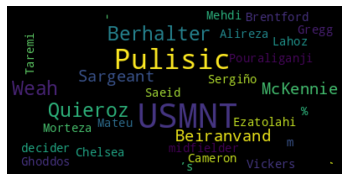

In [15]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

new_doc = nlp(" ".join(exluded_words))
new_excluded = Counter(token.text for token in new_doc if "\n" not in token.text)

def generate_wordcloud(most_list):
    wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(most_list)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

generate_wordcloud(new_excluded)

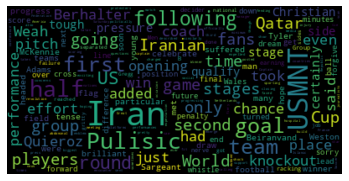

In [16]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

new_doc = nlp(" ".join(All_words))
new_All = Counter(token.text for token in new_doc if "\n" not in token.text)

def generate_wordcloud(most_list):
    wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(most_list)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

generate_wordcloud(new_All)